# Headline analysis

This notebook explores the most frequent significant words in headlines.

## Imports

In [19]:
import pandas as pd
from pandas.core.common import flatten
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

## Setup

In [10]:
pd.set_option("max_colwidth", 0)

## Data sourcing

In [11]:
headlines = pd.read_csv("./data/processed_headlines.csv")

headlines.head()

,title,source,keywords
0,Top GCSE marks tumble by 4.3% and passes return to pre-Covid levels - as students in England suffer sharpest drop while Wales and Northern Ireland keep inflated grades,Daily Mail,top gcse mark tumble 4.3 pass return pre-covid level student england suffer sharp drop wale northern ireland keep inflated grade
1,Fell short on GCSE results day? Here's what to do you don't get accepted by your preferred sixth form or college,Daily Mail,fell short gcse result day get accept preferred sixth form college
2,"Yevgeny Prigozhin was assassinated 'as a gift for Zelensky to celebrate Ukraine's victory day today', Putin's former spokesman claims",Daily Mail,yevgeny prigozhin assassinate as gift zelensky celebrate ukraine victory day today putin former spokesman claim
3,Moscow court extends arrest of jailed WSJ reporter Evan...,Daily Mail,moscow court extend arrest jailed wsj reporter evan ...
4,"GCSE results day 2023 LIVE: Pass grades fall for second year running in England, Wales and Northern Ireland - with 68.2% marked at 4/C",Daily Mail,gcse result day 2023 live pas grade fall second year run england wale northern ireland 68.2 mark 4/c


## Most frequent words

### Analysis

In [12]:
# Split the keywords strings into lists

headlines["keywords"] = headlines["keywords"].str.split(" ")

In [13]:
# Split the titles by source

dm = headlines[headlines["source"] == "Daily Mail"]
bbc = headlines[headlines["source"] == "BBC"]

In [14]:
# Flatten keyword lists

all_dm_keywords = flatten(dm["keywords"])
all_bbc_keywords = flatten(bbc["keywords"])

In [15]:
# Convert to series (makes them very countable)

all_dm_keywords = pd.Series(all_dm_keywords)
all_bbc_keywords = pd.Series(all_bbc_keywords)

# Then count them

dm_keyword_counts = all_dm_keywords.value_counts()
bbc_keyword_counts = all_bbc_keywords.value_counts()

[Text(0.5, 1.0, 'BBC')]

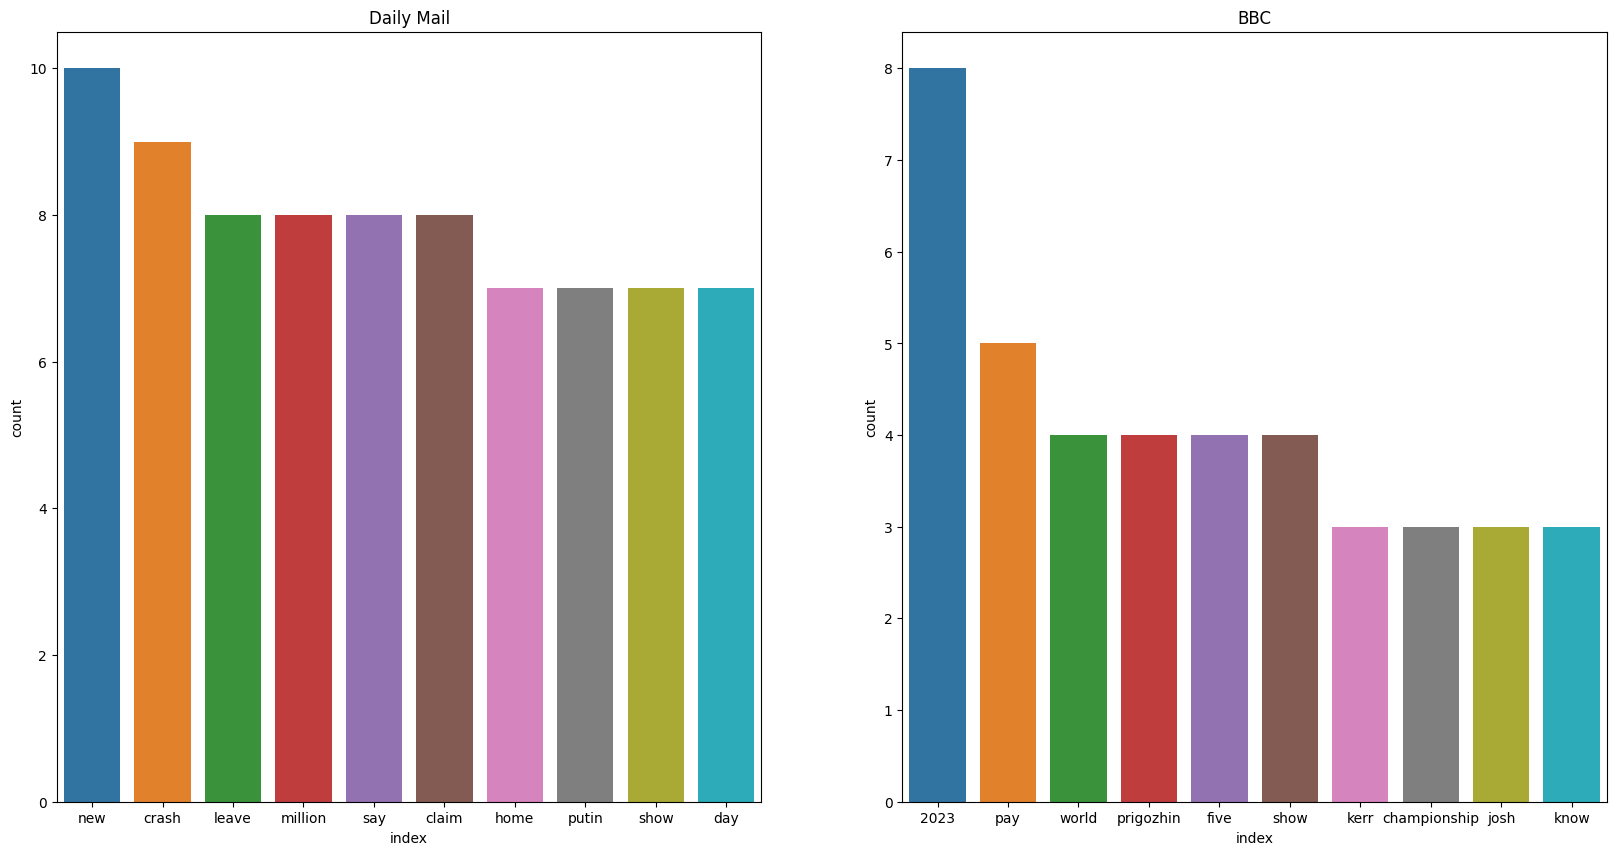

In [16]:
# Select the top ten of each

dm_top_ten = dm_keyword_counts.reset_index()[:10]
bbc_top_ten = bbc_keyword_counts.reset_index()[:10]

# Then graph them

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.barplot(dm_top_ten, x="index", y="count", ax=ax[0]).set(title='Daily Mail')
sns.barplot(bbc_top_ten, x="index", y="count", ax=ax[1]).set(title='BBC')

In [18]:
dm_keyword_counts

new         10
crash       9 
leave       8 
million     8 
say         8 
           .. 
took        1 
shudder     1 
jalopy      1 
quite       1 
pressure    1 
Name: count, Length: 1040, dtype: int64

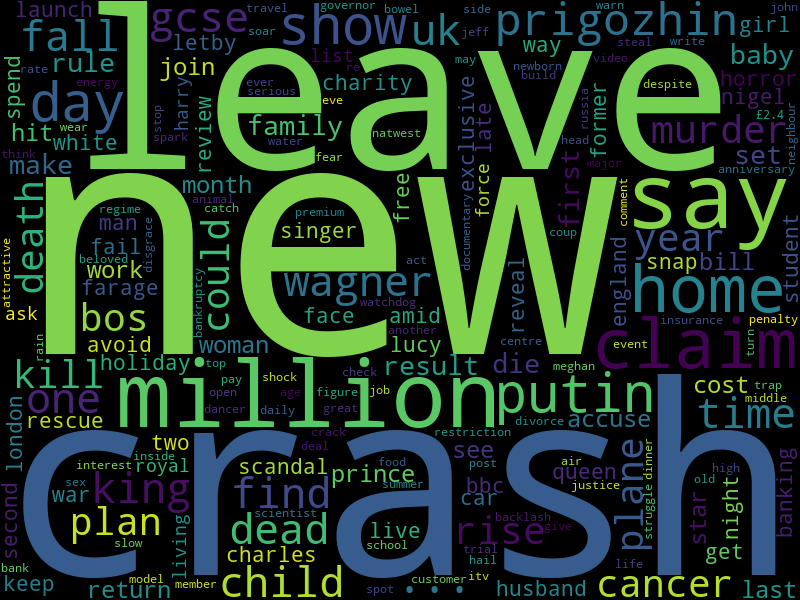

In [22]:
fog_machine = WordCloud(width=800, height=600) # Make a thing that generates clouds

fog_machine.generate_from_frequencies(dm_keyword_counts) # Generate the cloud

fog_machine.to_image()